In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#training data
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#testing data
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
PassengerId_test = df_test["PassengerId"]

In [6]:
dataset =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

In [7]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### **Analyze the features by pivoting techniques**

In [9]:
#Sex vs Survived
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
#Pclass(Ticket class) vs Survived
df_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
#SibSp(siblings / spouses) vs Survived
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
#Parch(parents / children) vs Survived
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### **Visualization**

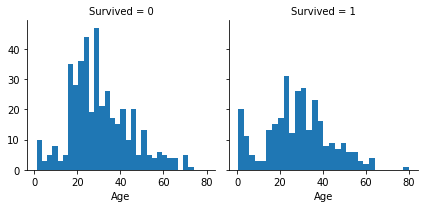

In [13]:
d = sns.FacetGrid(data=df_train, col='Survived')
d.map(plt.hist, 'Age', bins=30)

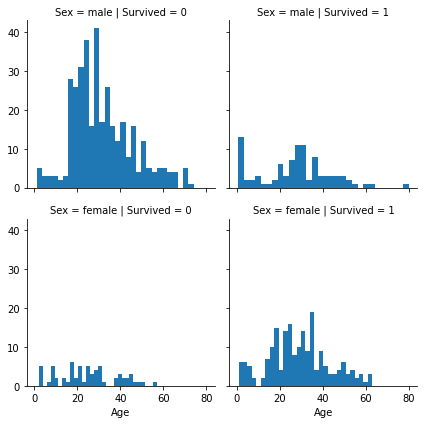

In [14]:
d2 = sns.FacetGrid(data=df_train, row='Sex', col='Survived')
d2.map(plt.hist, 'Age', bins=30)

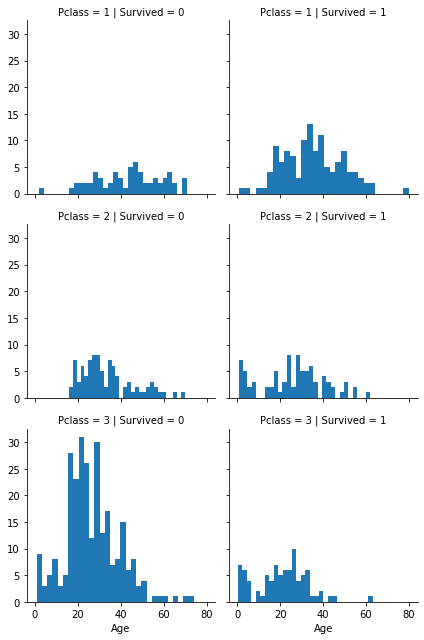

In [15]:
d3 = sns.FacetGrid(data=df_train, row='Pclass', col='Survived')
d3.map(plt.hist, 'Age', bins=30)

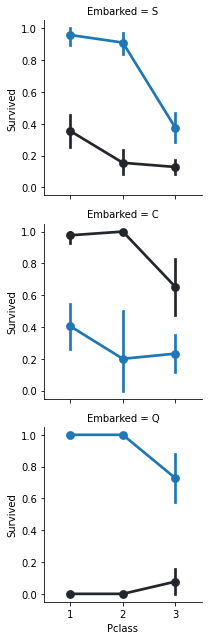

In [16]:
d4 = sns.FacetGrid(data=df_train, row='Embarked')
d4.map(sns.pointplot, 'Pclass','Survived','Sex', bins=30)

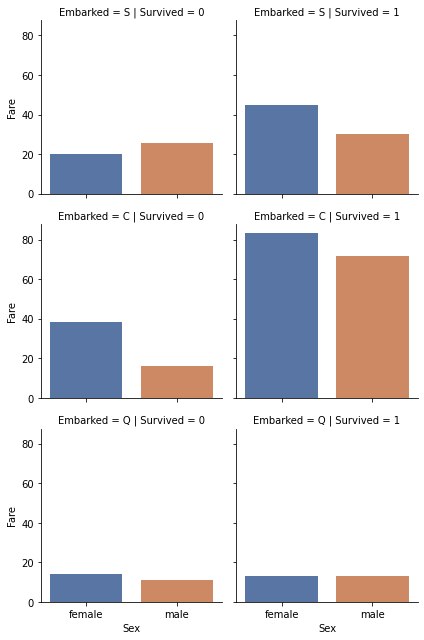

In [17]:
d5 = sns.FacetGrid(data=df_train, row='Embarked', col='Survived')
d5.map(sns.barplot, 'Sex','Fare', palette='deep', ci=None)

**Interpretation:**
1. Oldest passengers survived (Age=80).
2. Most passengers are in 17-37 age range approximately.
3. Pclass=2 and Pclass=3 passengers are mostly survived.
4. Pclass=3 had most passengers but most of the passengers did not survive.
5. Most passengers in Pclass=1 survived. 
6. Higher fare paying passengers had better survival.

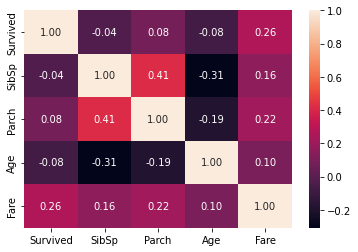

In [18]:
# Correlation matrix between numerical values (SibSp, Parch, Age and Fare values) and Survived 
d6 = sns.heatmap(df_train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f")

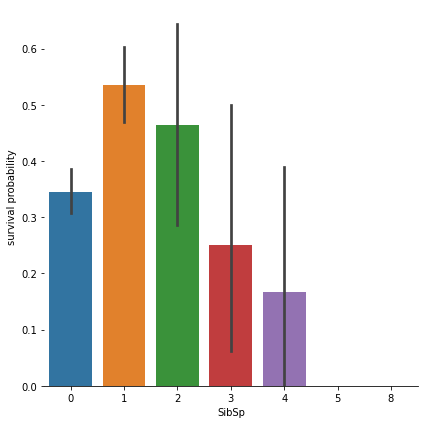

In [19]:
d7 = sns.factorplot(x="SibSp", y="Survived", data=df_train, kind="bar", size = 6)
d7.despine(left=True)
d7 = d7.set_ylabels("survival probability")

**Interpretation:**
It seems that passengers having a lot of siblings/spouses have less chance to survive

<AxesSubplot:xlabel='Fare'>

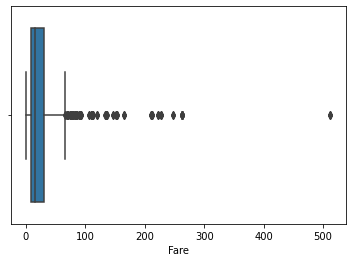

In [20]:
#box plot for fare col
sns.boxplot('Fare', data=dataset)

In [21]:
#we can consider the median value for imputing the missing Fare 
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

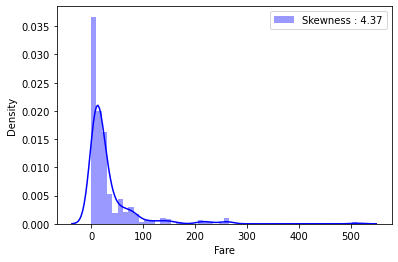

In [22]:
# Explore Fare distribution 
d8 = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()))
d8 = d8.legend(loc="best")

**Interpretation:**
Fare distribution is very skewed. This can lead to overweigth very high values in the model. In this case, it is better to transform it with the log function to reduce this skew.

In [23]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

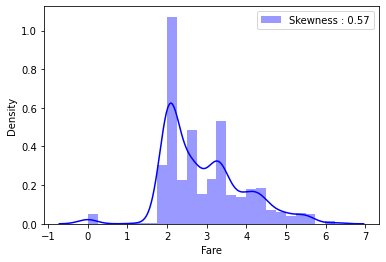

In [24]:
d9 = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()))
d9 = d9.legend(loc="best")

In [25]:
dataset.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")
dataset.Embarked.isnull().sum()

0

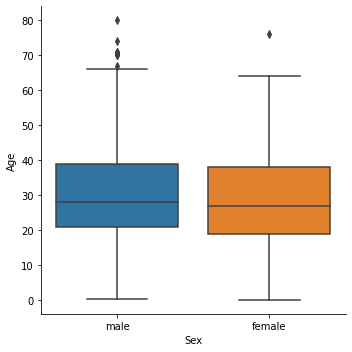

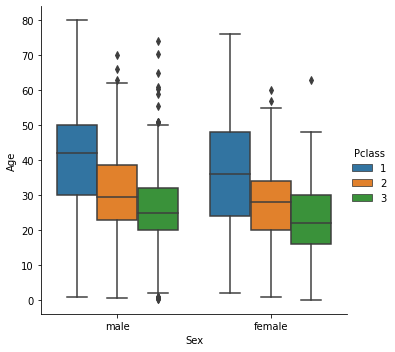

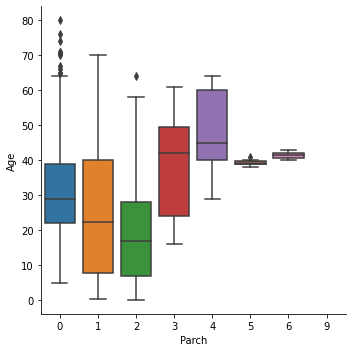

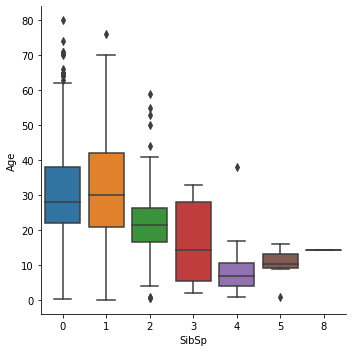

In [27]:
# Explore Age vs Sex, Parch , Pclass and SibSP
d10 = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")
d11 = sns.factorplot(y="Age",x="Sex", hue="Pclass", data=dataset, kind="box")
d12 = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")
d13 = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")

**Interpretation:**
1. Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age. However, 1st class passengers are older than 2nd class passengers who are also older than 3rd class passengers.

2. More a passenger has Parch(parents/children) the older he is and the more a passenger has SibSp(siblings/spouses) the younger he is.

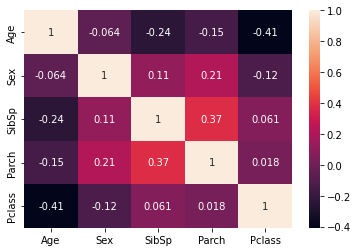

In [28]:
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

d14 = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot=True)

**Interpretation:**
1. Age is not correlated with Sex, but is negatively correlated with Pclass, Parch and SibSp.
2. In the plot of Age in function of Parch and 'Age' is growing with the number of Parch(parents/children). But generily      it is negativly correlated. So, we can use SibSP, Parch and Pclass in order to impute the missing ages.

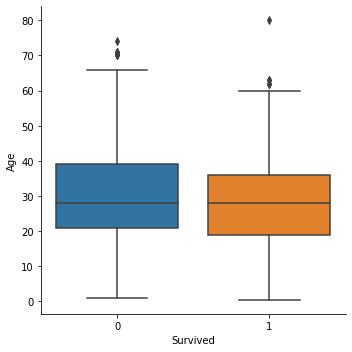

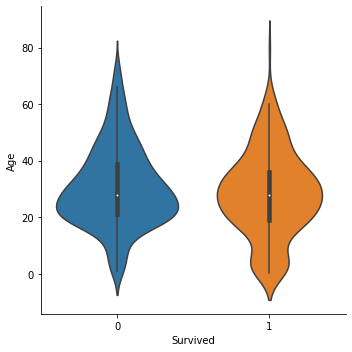

In [29]:
# Fill Age with the median age of similar rows according to Pclass, Parch and SibSp. Index of NaN age rows
index_nan_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_nan_age :
    age_median = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_median
        
        
d15 = sns.factorplot(x="Survived", y = "Age", data = df_train, kind="box")
d16 = sns.factorplot(x="Survived", y = "Age", data = df_train, kind="violin")

**Interpretation:**
Violin plot of survived passengers, we still notice that very young passengers have higher survival rate.

In [30]:
# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [31]:
# convert to indicator values Embarked 
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [32]:
dataset["Cabin"].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [33]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [34]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

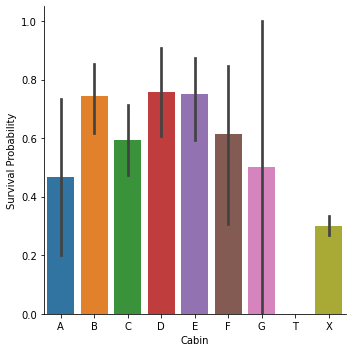

In [35]:
d17 = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
d18 = d17.set_ylabels("Survival Probability")

**Interpretation:**
Because of the low number of passenger that have a cabin, survival probabilities have an important standard deviation and we can't distinguish between survival probability of passengers in the different desks.

But we can see that passengers with a cabin have generally more chance to survive than passengers without (X).

In [36]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

In [37]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [38]:
# Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

ticket = []
for t in list(dataset.Ticket):
    if not t.isdigit() :
        ticket.append(t.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        ticket.append("X")
        
dataset["Ticket"] = ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [39]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

# Drop useless variables 
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [40]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S,Cabin_A,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0.0,0,22.0,1,0,1.981001,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,1,0,4.266662,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,26.0,0,0,2.070022,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,3.972177,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0.0,0,35.0,0,0,2.085672,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [41]:
# Separate train dataset and test dataset
train_len = len(df_train)
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

In [42]:
# Separate train features and label 

train["Survived"] = train["Survived"].astype(int)
y_train = train["Survived"]
x_train = train.drop(labels = ["Survived"],axis = 1)

In [43]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
k_fold = StratifiedKFold(n_splits=10)

random_state = 40
classifiers  = []

classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))

classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), 
                                      random_state=random_state, 
                                      learning_rate=0.001))

classifiers.append(GradientBoostingClassifier(random_state=random_state))

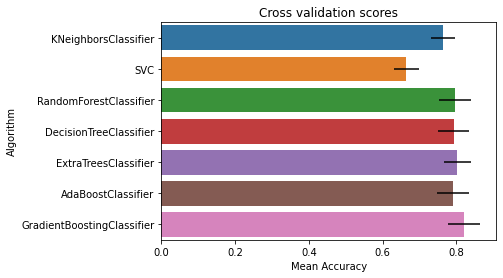

In [45]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = k_fold, n_jobs=2))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,
                       "CrossValerrors": cv_std,
                       "Algorithm":["KNeighborsClassifier", 
                                    "SVC", 
                                    "RandomForestClassifier",
                                    "DecisionTreeClassifier",
                                    "ExtraTreesClassifier",
                                    "AdaBoostClassifier",
                                    "GradientBoostingClassifier"]})

d = sns.barplot("CrossValMeans","Algorithm", data = cv_res, orient = "h",**{'xerr':cv_std})
d.set_xlabel("Mean Accuracy")
d = d.set_title("Cross validation scores")

### Random Forest

In [46]:
rfc = RandomForestClassifier()

rfc_param_grid = {"max_depth":[None],
                  "max_features":[1, 3, 20],
                  "min_samples_split": [2, 3, 20],
                  "min_samples_leaf": [1, 3, 20],
                  "bootstrap": [False],
                  "n_estimators" :[100,300],
                  "criterion": ["gini"]}

grid_search_rfc = GridSearchCV(rfc, 
                               param_grid=rfc_param_grid, 
                               cv=k_fold, 
                               scoring="accuracy", 
                               n_jobs=2, 
                               verbose=1)

grid_search_rfc.fit(x_train, y_train)
rfc_best_estimator = grid_search_rfc.best_estimator_
grid_search_rfc.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 540 out of 540 | elapsed:  1.4min finished


0.8339700374531835